In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

%matplotlib inline


# Confusion Matrix

## Overview

- True Positives (**TP**): correctly predicted Positive Class
- True Negatives (**TN**): correctly predicted Negative Class
- False Positives (**FP**): incorrectly predicted Positive Class
- False Negatives (**FN**): incorrectly predicted Negative Class

<img src="../../images/confusion_matrix.png">


To compute the comfusion matrix we will use the scikit's [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function


In [2]:
y_true = [0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1]
# TP = 2, FP=3, TN = 0, FN = 1

cnf_matrix = confusion_matrix(y_true, y_pred)
print('confusion matrix:\n', cnf_matrix)
print('~' * 50)

# to get the TP... and so on, values, we need to flatten the matrix with np.ravel() method:
tn, fp, fn, tp = cnf_matrix.ravel()

print(f'tn : {tn}')
print(f'fp : {fp}')
print(f'fn : {fn}')
print(f'tp : {tp}')

confusion matrix:
 [[0 3]
 [1 2]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tn : 0
fp : 3
fn : 1
tp : 2


**Change default labeling**

We can pass third parameter to confusion_matrix(), i.e. *labels* : array-like of shape (n_classes), default=None; List of labels to index the matrix. This **may be used to reorder or select a subset of labels**.


In [8]:
cm = confusion_matrix(y_true, y_pred, labels=[1,0])
print('confusion matrix:\n', cm)

tn, fp, fn, tp = cm.ravel()

print(f'tn : {tn}')
print(f'fp : {fp}')
print(f'fn : {fn}')
print(f'tp : {tp}')

confusion matrix:
 [[2 1]
 [3 0]]
tn : 2
fp : 1
fn : 3
tp : 0


### Plot CM

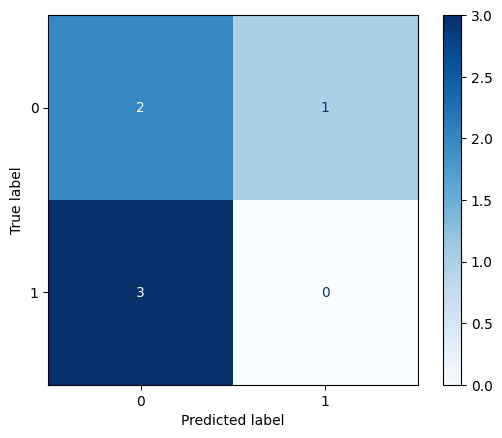

In [9]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Precision and recall metrix

### Overview

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved.



<img src="./images/Precision_Recall_part1.png" style="height:500px; display:inline-block; vertical-align:middle">
<img src="./images/Precision_Recall_part2.png" style="height:300px;  display:inline-block; margin-left:1em; vertical-align:middle">

Reference: [Precision_and_recall @wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

### Calculation

Precision = TP / (TP + FP)

Recall:  TP / (TP + FN)

In [167]:
y_true = [0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1]
# TP = 2, FP=3, TN = 0, FN = 1


cnf_matrix = confusion_matrix(y_true, y_pred)
print('confusion matrix:\n', cnf_matrix)
print('~' * 50)

# to get the TP... and so on, values, we need to flatten the matrix with np.ravel() method:
tn, fp, fn, tp = cnf_matrix.ravel()

print(f'tn : {tn}')
print(f'fp : {fp}')
print(f'fn : {fn}')
print(f'tp : {tp}')

confusion matrix:
 [[0 3]
 [1 2]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tn : 0
fp : 3
fn : 1
tp : 2


In [186]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
acc_score = metrics.accuracy_score(y_true, y_pred);

print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'acc_score: {acc_score}')

precision: 0.4
recall: 0.6666666666666666
acc_score: 0.3333333333333333


In [187]:
# or using the scikit methods:

print(f'precision: {metrics.precision_score(y_true, y_pred)}')
print(f'recall: {metrics.recall_score(y_true, y_pred)}')

precision: 0.4
recall: 0.6666666666666666


## Demo on different estimators

## Prepare the data

Let's generate a random n-class classification problem dataset, using scikit  function: [make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

The dataset will have 1,000 observations, with 10 input features, five of which will be informative and the remaining five will be redundant.

In [173]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=10,
    n_informative=5, n_redundant=5,
    n_classes=2, weights=[0.2, 0.8],
    random_state=42)

print(X.shape, y.shape)

print(f'y unique values: {np.unique(y, return_counts=True)}')

(1000, 10) (1000,)
y unique values: (array([0, 1]), array([202, 798]))


In [174]:
# let's bring some semanthics into classes:
class_names = ['terorist', 'non-terorist']

## Separate the training data from the test data

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

# X_train = X_test = df[['x1','x2']]
# y_train=y_test = df.y

X_train shape: (800, 10)
X_test shape: (200, 10)


## Choose and Train the model

We will use 2 classifiers, in order to compare the CM:

- a Dummy one, which always will predict one class only
- a CVM classifier

In [176]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [177]:
dummy = DummyClassifier(strategy="most_frequent")
svc = SVC(kernel="linear", C=12)
lr = LogisticRegression(random_state=0)

In [178]:
dummy_y_pred = dummy.fit(X_train, y_train).predict(X_test)
svc_y_pred = svc.fit(X_train, y_train).predict(X_test)
lr_y_pred = lr.fit(X_train, y_train).predict(X_test)

In [179]:
max(y_test.mean(), 1 - y_test.mean())

0.79

## Evaluating the Model

### Classifier Accuracy Score

In [180]:
# Model Accuracy:
print("Dummy Accuracy:",metrics.accuracy_score(y_test, dummy_y_pred))
print("SVC Accuracy:",metrics.accuracy_score(y_test, svc_y_pred))
print("LR Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))

Dummy Accuracy: 0.79
SVC Accuracy: 0.885
LR Accuracy: 0.895


In [182]:
# Model Precision:
print("Dummy Precision:",metrics.precision_score(y_test, dummy_y_pred))
print("SVC Precision:",metrics.precision_score(y_test, svc_y_pred))
print("LR Precision:",metrics.precision_score(y_test, lr_y_pred))

Dummy Precision: 0.79
SVC Precision: 0.8994082840236687
LR Precision: 0.9101796407185628


In [183]:
# Model Recall:
print("Dummy Recall:",metrics.recall_score(y_test, dummy_y_pred))
print("SVC Recall:",metrics.recall_score(y_test, svc_y_pred))
print("LR Recall:",metrics.recall_score(y_test, svc_y_pred))

Dummy Recall: 1.0
SVC Recall: 0.9620253164556962
LR Recall: 0.9620253164556962


In [184]:
print(metrics.confusion_matrix(y_test, svc_y_pred))

[[ 25  17]
 [  6 152]]
